In [2]:
### Important notice : this notebook works under @dft_for_sm conda env...

In [3]:
clear()

In [4]:
from rdkit import Chem
from rdkit.Chem import rdqueries
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
import numpy as np
import pandas as pd
import sys
sys.path.append('../')
import dft_descriptors.prepocessing as pp
from dft_descriptors import numbering_CO as nb

In [5]:
def get_mecanism(smi_ax, df):
    new_df = df[df["A-X effectif"] == smi_ax]
    return new_df["Mechanism"].unique()

def number_ax(smi_ax, df):
    for smi in df["A-X effectif"].unique():
        M = get_mecanism(smi, df)
    return 
 
# Numbering Murahashi A-X substituents
def num_Muharashi(smi_ax):
    m = Chem.MolFromSmiles(smi_ax)

    # Number 0 the Li center
    for at in m.GetAtoms():
        if at.GetAtomicNum() == 3 :
            nb.reset_atom_map(m, 0)
            at.SetAtomMapNum(0)
            at_c = at.GetNeighbors()[0]
    
    # number 1 the C adjacent
    nb.reset_atom_map(m, 1)
    at_c.SetAtomMapNum(1)
    
    # number 2 and 3 the C adjacents if existing
    ats_nc = at_c.GetNeighbors()  
    i = 2 
    for at in ats_nc:
        if at.GetAtomicNum() != 3:
            nb.reset_atom_map(m, i)
            at.SetAtomMapNum(i)
            i += 1
    
    # numbering till 5 the following groups
    while i <= 4:
        for at in m.GetAtoms():
            if at.GetAtomMapNum() == i-1:
                at_last = [x.GetIdx() for x in at.GetNeighbors()]
      
        for at in m.GetAtoms():
            if at.GetIdx() in at_last and at.GetAtomMapNum() > i-1:
                nb.reset_atom_map(m, i)
                at.SetAtomMapNum(i)
        i +=1        
    return Chem.MolToSmiles(m)


# Numbering Suzuki A-X substituents
def num_Suzuki(smi_ax):
    m = Chem.MolFromSmiles(smi_ax)
    
    # Number 0 the Li center
    for at in m.GetAtoms():
        if at.GetAtomicNum() == 5 :
            nb.reset_atom_map(m, 0)
            at.SetAtomMapNum(0)
            at_c = at.GetNeighbors()
    at_cs = [x.GetIdx() for x in at_c]
    
    # number 1 the C adjacent and 4,5 the Oxygens
    i = 4
    
    for at in m.GetAtoms():
        if at.GetIdx() in at_cs and at.GetAtomicNum() == 6:
            nb.reset_atom_map(m, 1)
            at.SetAtomMapNum(1)
            ats_nc = at.GetNeighbors()
        
        elif at.GetIdx() in at_cs and at.GetAtomicNum() == 5:
            nb.reset_atom_map(m, 1)
            at.SetAtomMapNum(1)
            ats_nc = at.GetNeighbors()
            
        elif at.GetIdx() in at_cs and at.GetAtomicNum() == 14:
            nb.reset_atom_map(m, 1)
            at.SetAtomMapNum(1)
            ats_nc = at.GetNeighbors()
            
        elif at.GetIdx() in at_cs and at.GetAtomicNum() == 8:
            nb.reset_atom_map(m, i)
            at.SetAtomMapNum(i)
            i+=1
    
    # number 2 and 3 the C adjacents if existing 
    i = 2 
    for at in ats_nc:
        if at.GetAtomicNum() != 5:
            nb.reset_atom_map(m, i)
            at.SetAtomMapNum(i)
            i += 1
    
    # numbering till 4 the following groups if needed
    while i <= 3:
        for at in m.GetAtoms():
            if at.GetAtomMapNum() == i-1:
                at_last = [x.GetIdx() for x in at.GetNeighbors()]
      
        for at in m.GetAtoms():
            if at.GetIdx() in at_last and at.GetAtomMapNum() > i-1:
                nb.reset_atom_map(m, i)
                at.SetAtomMapNum(i)
        i +=1        
    return Chem.MolToSmiles(m)



# Numbering Kumada substituents
def num_Kumada(smi_ax):
    m = Chem.MolFromSmiles(smi_ax)
    
    # Number 0 the Mg center
    for at in m.GetAtoms():
        if at.GetAtomicNum() == 12 :
            nb.reset_atom_map(m, 0)
            at.SetAtomMapNum(0)
            at_c = at.GetNeighbors()
    at_cs = [x.GetIdx() for x in at_c]
    
    # number 1 the C adjacent  
    for at in m.GetAtoms():
        if at.GetIdx() in at_cs and at.GetAtomicNum() == 6:
            nb.reset_atom_map(m, 1)
            at.SetAtomMapNum(1)
            ats_nc = at.GetNeighbors()
            
    
    # number 2 and 3 the C adjacents if existing 
    i = 2 
    for at in ats_nc:
        if at.GetAtomicNum() != 12:
            nb.reset_atom_map(m, i)
            at.SetAtomMapNum(i)
            i += 1
    
    # numbering till 4 the following groups if needed
    while i <= 3:
        for at in m.GetAtoms():
            if at.GetAtomMapNum() == i-1:
                at_last = [x.GetIdx() for x in at.GetNeighbors()]
      
        for at in m.GetAtoms():
            if at.GetIdx() in at_last and at.GetAtomMapNum() > i-1:
                nb.reset_atom_map(m, i)
                at.SetAtomMapNum(i)
        i +=1        
    return Chem.MolToSmiles(m)


# Numbering Zincate 
def num_Zincate(smi_ax):
    m = Chem.MolFromSmiles(smi_ax)
    
    # Number 0 the Zn center
    for at in m.GetAtoms():
        if at.GetAtomicNum() == 30 :
            nb.reset_atom_map(m, 0)
            at.SetAtomMapNum(0)
            at_c = at.GetNeighbors()
    at_cs = [x.GetIdx() for x in at_c]
    
    # number 1 the C adjacent  
    for at in m.GetAtoms():
        if at.GetIdx() in at_cs and at.GetAtomicNum() == 6:
            if len(at.GetNeighbors()) > 1:
                nb.reset_atom_map(m, 1)
                at.SetAtomMapNum(1)
                ats_nc = at.GetNeighbors()
            
    
    # number 2 and 3 the C adjacents if existing 
    i = 2 
    for at in ats_nc:
        if at.GetAtomicNum() != 30:
            nb.reset_atom_map(m, i)
            at.SetAtomMapNum(i)
            i += 1
    
    # numbering till 4 the following groups if needed
    while i <= 3:
        for at in m.GetAtoms():
            if at.GetAtomMapNum() == i-1:
                at_last = [x.GetIdx() for x in at.GetNeighbors()]
      
        for at in m.GetAtoms():
            if at.GetIdx() in at_last and at.GetAtomMapNum() > i-1:
                nb.reset_atom_map(m, i)
                at.SetAtomMapNum(i)
        i +=1        
    return Chem.MolToSmiles(m)


# Numbering Zincate 
def num_Aluminate(smi_ax):
    m = Chem.MolFromSmiles(smi_ax)
    
    # Number 0 the Al center
    for at in m.GetAtoms():
        if at.GetAtomicNum() == 13 :
            nb.reset_atom_map(m, 0)
            at.SetAtomMapNum(0)
            at_c = at.GetNeighbors()
    at_cs = [x.GetIdx() for x in at_c]
    
    # number 1 the C adjacent  
    L1 = m.GetSubstructMatches(Chem.MolFromSmiles('CC(C)C'))
    list_idx1 = [ i[j] for i in L1 for j in range(len(i))]
    if len(list_idx1) > 1: 
        for at in m.GetAtoms():
            if at.GetIdx() in at_cs:
                if at.GetIdx() not in list_idx1:
                    nb.reset_atom_map(m, 1)
                    at.SetAtomMapNum(1)
                    ats_nc = at.GetNeighbors()
    else:
        L2 = m.GetSubstructMatches(Chem.MolFromSmarts('[CH3]'))
        list_idx2  = [ i[j] for i in L2 for j in range(len(i))]
        for at in m.GetAtoms():
            if at.GetIdx() in at_cs:
                if at.GetIdx() not in list_idx1:
                    nb.reset_atom_map(m, 1)
                    at.SetAtomMapNum(1)
                    ats_nc = at.GetNeighbors()
            
    
    # number 2 and 3 the C adjacents if existing 
    i = 2 
    for at in ats_nc:
        if at.GetAtomicNum() != 13:
            nb.reset_atom_map(m, i)
            at.SetAtomMapNum(i)
            i += 1
    
    # numbering till 4 the following groups if needed
    while i <= 3:
        for at in m.GetAtoms():
            if at.GetAtomMapNum() == i-1:
                at_last = [x.GetIdx() for x in at.GetNeighbors()]
      
        for at in m.GetAtoms():
            if at.GetIdx() in at_last and at.GetAtomMapNum() > i-1:
                nb.reset_atom_map(m, i)
                at.SetAtomMapNum(i)
        i +=1        
    return Chem.MolToSmiles(m)

# Numbering Isocyanates :
def num_Isocyanates(smi_ax):
    m = Chem.MolFromSmiles(smi_ax)
    L = m.GetSubstructMatch(Chem.MolFromSmiles('N=C=O'))

    # Number 0 the Li center
    for at in m.GetAtoms():
        if at.GetIdx() in L:
            if at.GetAtomicNum() == 8:
                nb.reset_atom_map(m, 0)
                at.SetAtomMapNum(0)
            elif at.GetAtomicNum() == 6:
                nb.reset_atom_map(m, 1)
                at.SetAtomMapNum(1)
            elif at.GetAtomicNum() == 7:
                nb.reset_atom_map(m, 2)
                at.SetAtomMapNum(2)
                at_ns = at.GetNeighbors()
    
    at_n = [x.GetIdx() for x in at_ns]
    # number 3 the C adjacent 
    for at in m.GetAtoms():
        if at.GetIdx() in at_n and at.GetAtomMapNum() != 1:
            nb.reset_atom_map(m, 3)
            at.SetAtomMapNum(3)
    
    i = 3
    # numbering till 5 the following groups
    while i <= 4:
        for at in m.GetAtoms():
            if at.GetAtomMapNum() == i-1:
                at_last = [x.GetIdx() for x in at.GetNeighbors()]
      
        for at in m.GetAtoms():
            if at.GetIdx() in at_last and at.GetAtomMapNum() > i-1:
                nb.reset_atom_map(m, i)
                at.SetAtomMapNum(i)
        i +=1        
    return Chem.MolToSmiles(m)

# Numbering CO2 :
def num_CO2(smi_ax):
    m = Chem.MolFromSmiles(smi_ax)
    i = 0
    for at in m.GetAtoms():
        if at.GetAtomicNum() == 8:
            nb.reset_atom_map(m, i)
            at.SetAtomMapNum(i)
            i += 2
        else:
            nb.reset_atom_map(m, 1)
            at.SetAtomMapNum(1)
            
    return Chem.MolToSmiles(m)


# Numbering Imidazoles :
def num_imidazole_derivatives(smi_ax):
    m = Chem.MolFromSmiles(smi_ax)
    if m.HasSubstructMatch(Chem.MolFromSmiles('N1=CNC=C1')):
        smi_n = num_imidazole(smi_ax)
    elif m.HasSubstructMatch(Chem.MolFromSmiles('c1cc2ccccc2cn1')):
        smi_n = num_quinoline(smi_ax)
    elif m.HasSubstructMatch(Chem.MolFromSmiles('O1C=CN=C1')):
        smi_n = num_imidazole_o(smi_ax)
    elif m.HasSubstructMatch(Chem.MolFromSmiles('S1C=CN=C1')):
        smi_n = num_imidazole_s(smi_ax)   
    elif m.HasSubstructMatch(Chem.MolFromSmiles('CN1C=NC=N1')):
        smi_n = num_triazole(smi_ax)
    return smi_n

def num_triazole(smi_ax):
    m = Chem.MolFromSmiles(smi_ax)
    if m.HasSubstructMatch(Chem.MolFromSmiles('Cn1cncn1')):
        smi_n = '[CH3:6][n:2]1[c:1]([H:0])[n:3][cH:4][n:5]1'
    return smi_n

def num_quinoline(smi_ax):
    m = Chem.MolFromSmiles(smi_ax)
    if m.HasSubstructMatch(Chem.MolFromSmiles('c2ccc1cnc(C)cc1c2')):
        smi_n = '[cH:9]1[cH:11][cH:5][c:3]2[c:1]([H:0])[n:2][c:6]([CH3:7])[cH:8][c:4]2[cH:10]1'
    elif m.HasSubstructMatch(Chem.MolFromSmiles('c1cc2ccccc2cn1')):
        smi_n = '[cH:9]1[cH:7][cH:5][c:3]2[c:1]([H:0])[n:2][c:6][cH:8][c:4]2[cH:10]1'
    return smi_n
   
def num_imidazole(smi_ax):  
    m = Chem.MolFromSmiles(smi_ax)
    if m.HasSubstructMatch(Chem.MolFromSmiles('N1=CNC=C1')):
        L = m.GetSubstructMatch(Chem.MolFromSmiles('N1=CNC=C1'))
        n = 7
    elif m.HasSubstructMatch(Chem.MolFromSmiles('O1C=CN=C1')):
        L = m.GetSubstructMatch(Chem.MolFromSmiles('O1C=CN=C1'))
        n = 8
    elif m.HasSubstructMatch(Chem.MolFromSmiles('N1=CSC=C1')):
        L = m.GetSubstructMatch(Chem.MolFromSmiles('N1=CSC=C1'))
        n = 16
    
    # free the postion 0
    m = nb.mol_with_atom_index(m)
    for at in m.GetAtoms():
        if at.GetIdx() == 0:
            at.SetAtomMapNum(len(m.GetAtoms())+1)

    i = 2
    j = 4

    for at in m.GetAtoms():
        if at.GetIdx() in L:
            if at.GetAtomicNum() == n:
                nb.reset_atom_map(m, i)
                at.SetAtomMapNum(i)     
                i += 1
                
            elif at.GetAtomicNum() == 6:
                good = True
                for at_n in at.GetNeighbors():
                    if at_n.GetAtomicNum() != n:
                        good = False
                if good == True:
                    nb.reset_atom_map(m, 1)
                    at.SetAtomMapNum(1)
                else:
                    nb.reset_atom_map(m, j)
                    at.SetAtomMapNum(j)
                    j+=1
                    
    smi_n = Chem.MolToSmiles(m)
    return smi_n.replace('[cH:1]', '[c:1]([H:0])')


def num_imidazole_o(smi_ax):  
    m = Chem.MolFromSmiles(smi_ax)
    L = m.GetSubstructMatch(Chem.MolFromSmiles('O1C=CN=C1'))
    
    # free the postion 0
    m = nb.mol_with_atom_index(m)
    for at in m.GetAtoms():
        if at.GetIdx() == 0:
            at.SetAtomMapNum(len(m.GetAtoms())+1)


    j = 4

    for at in m.GetAtoms():
        if at.GetIdx() in L:
            if at.GetAtomicNum() == 7:
                nb.reset_atom_map(m, 2)
                at.SetAtomMapNum(2)
                
            elif at.GetAtomicNum() == 8:
                nb.reset_atom_map(m, 3)
                at.SetAtomMapNum(3)
  
            elif at.GetAtomicNum() == 6:
                good = True
                for at_n in at.GetNeighbors():
                    if at_n.GetAtomicNum() != 7 and at_n.GetAtomicNum() != 8:
                        good = False
                if good == True:
                    nb.reset_atom_map(m, 1)
                    at.SetAtomMapNum(1)
                else:
                    nb.reset_atom_map(m, j)
                    at.SetAtomMapNum(j)
                    j+=1
                    
    smi_n = Chem.MolToSmiles(m)
    return smi_n.replace('[cH:1]', '[c:1]([H:0])')

def num_imidazole_s(smi_ax):  
    m = Chem.MolFromSmiles(smi_ax)
    L = m.GetSubstructMatch(Chem.MolFromSmiles('S1C=CN=C1'))
    
    # free the postion 0
    m = nb.mol_with_atom_index(m)
    for at in m.GetAtoms():
        if at.GetIdx() == 0:
            at.SetAtomMapNum(len(m.GetAtoms())+1)


    j = 4

    for at in m.GetAtoms():
        if at.GetIdx() in L:
            if at.GetAtomicNum() == 7:
                nb.reset_atom_map(m, 2)
                at.SetAtomMapNum(2)
                
            elif at.GetAtomicNum() == 16:
                nb.reset_atom_map(m, 3)
                at.SetAtomMapNum(3)
  
            elif at.GetAtomicNum() == 6:
                good = True
                for at_n in at.GetNeighbors():
                    if at_n.GetAtomicNum() != 7 and at_n.GetAtomicNum() != 16:
                        good = False
                if good == True:
                    nb.reset_atom_map(m, 1)
                    at.SetAtomMapNum(1)
                else:
                    nb.reset_atom_map(m, j)
                    at.SetAtomMapNum(j)
                    j+=1
                    
    smi_n = Chem.MolToSmiles(m)
    return smi_n.replace('[cH:1]', '[c:1]([H:0])')


# Numbering cetones :
def num_cetones(smi_ax):
    m = Chem.MolFromSmiles(smi_ax)
    L = m.GetSubstructMatch(Chem.MolFromSmiles('CC(=O)C'))
    m = nb.mol_with_atom_index(m)
    
    # free the position 0
    for at in m.GetAtoms():
        if at.GetIdx() == 0:
            at.SetAtomMapNum(len(m.GetAtoms())+1)
    # Number 1 the C-H center
    for at in m.GetAtoms():
        if at.GetIdx() in L:
            if at.GetAtomicNum() == 6:
                if len(at.GetNeighbors()) < 3:
                    nb.reset_atom_map(m, 1)
                    at.SetAtomMapNum(1)
                    at_ns = at.GetNeighbors()
                    
    at_n = [x.GetIdx() for x in at_ns]
    
    for at in m.GetAtoms():
        if at.GetIdx() in L and at.GetIdx() in at_n:
            nb.reset_atom_map(m, 2)
            at.SetAtomMapNum(2)
            at_ns = at.GetNeighbors()
                    
    at_n = [x.GetIdx() for x in at_ns]

    for at in m.GetAtoms():
        if at.GetIdx() in at_n and at.GetAtomMapNum() != 1:
            if at.GetAtomicNum() == 6: 
                nb.reset_atom_map(m, 3)
                at.SetAtomMapNum(3)
            elif at.GetAtomicNum() == 8: 
                nb.reset_atom_map(m, 4)
                at.SetAtomMapNum(4)
    
    smi_n = Chem.MolToSmiles(m)
    if '[CH2:1]' in smi_n:
        smi_n = smi_n.replace('[CH2:1]', '[CH:1]([H:0])')
    elif '[CH3:1]' in smi_n:
        smi_n = smi_n.replace('[CH3:1]', '[CH2:1]([H:0])')
    elif '[CH:1]' in smi_n:
        smi_n = smi_n.replace('[CH:1]', '[C:1]([H:0])')
        
    return smi_n

# Numbering HP=O :
def num_PO(smi_ax):
    m = Chem.MolFromSmiles(smi_ax)
    L = m.GetSubstructMatch(Chem.MolFromSmiles('P=O'))
    m = nb.mol_with_atom_index(m)
    
    # free the position 0
    for at in m.GetAtoms():
        if at.GetIdx() == 0:
            at.SetAtomMapNum(len(m.GetAtoms())+1)
            
    # Number 1 the P center
    for at in m.GetAtoms():
        if at.GetIdx() in L:
            if at.GetAtomicNum() == 15:
                nb.reset_atom_map(m, 1)
                at.SetAtomMapNum(1)
                at_ns = at.GetNeighbors()
            elif at.GetAtomicNum() == 8:
                nb.reset_atom_map(m, 2)
                at.SetAtomMapNum(2)
                    
    at_n = [x.GetIdx() for x in at_ns]
    i = 2
    
    for at in m.GetAtoms():
        if at.GetIdx() in at_n:
            if at.GetAtomMapNum() > 2:
                nb.reset_atom_map(m, i)
                at.SetAtomMapNum(i)
                i += 1
    
    smi_n = Chem.MolToSmiles(m)
    smi_n = smi_n.replace('[PH:1]', '[P:1]([H:0])')
    return smi_n


# Numbering Silicates :
def num_silicate(smi_ax):
    m = Chem.MolFromSmiles(smi_ax)
    m = nb.mol_with_atom_index(m)
    
    #  Si in position 0
    for at in m.GetAtoms():
        if at.GetAtomicNum() == 14:
            nb.reset_atom_map(m, 0)
            at.SetAtomMapNum(0)
            at_ns = at.GetNeighbors()
            
    at_n = [x.GetIdx() for x in at_ns]
    at_nc = []    
    
    # Number 1 the good C center
    for at in m.GetAtoms():
        if at.GetIdx() in at_n:
            if at.GetAtomicNum() == 6:
                at_nc.append(at.GetIdx())
    
    if len(at_nc) > 1:
        for at in m.GetAtoms():
            if at.GetIdx() in at_nc:
                if len(at.GetNeighbors()) > 1:
                    c_num = at.GetIdx()
            
    elif len(at_nc) == 1:
        c_num = at_nc[0]
        
    for at in m.GetAtoms():
        if at.GetIdx() == c_num:
            nb.reset_atom_map(m, 1)
            at.SetAtomMapNum(1)
            at_ns = at.GetNeighbors()
            
    # Number 2 and 3 the C neigbors
    
    i = 2
    at_n = [x.GetIdx() for x in at_ns]
    
    while i < 4:
        for at in m.GetAtoms():  
            if at.GetIdx() in at_n and at.GetAtomMapNum() > i-1:
                nb.reset_atom_map(m, i)
                at.SetAtomMapNum(i)
                i += 1

    return Chem.MolToSmiles(m)


# Numbering Amines :
def num_Amines(smi_ax):
    m = Chem.MolFromSmiles(smi_ax)
    #L = m.GetSubstructMatch(Chem.MolFromSmiles('CN'))
    L = m.GetSubstructMatches(Chem.MolFromSmarts('C[NH]C'))[0]
    m = nb.mol_with_atom_index(m)
    
    # free the position 0
    for at in m.GetAtoms():
        if at.GetIdx() == 0:
            at.SetAtomMapNum(len(m.GetAtoms())+1)
    
    i = 2
    at_n = []
    # Number 1 the N center
    for at in m.GetAtoms():
        if at.GetIdx() in L:
            if at.GetAtomicNum() == 7:
                nb.reset_atom_map(m, 1)
                at.SetAtomMapNum(1)
                
            elif at.GetAtomicNum() == 6:
                nb.reset_atom_map(m, i)
                at.SetAtomMapNum(i)
                at_ns = at.GetNeighbors()
                for x in at_ns:
                    at_n.append(x.GetIdx())
                i+=1
                
    for at in m.GetAtoms():
        if at.GetIdx() in at_n:
            if at.GetAtomMapNum() != 1:
                nb.reset_atom_map(m, i)
                at.SetAtomMapNum(i)
                i+=1
            
    
    smi_n = Chem.MolToSmiles(m)
    smi_n = smi_n.replace('[NH:1]', '[N:1]([H:0])')
    return smi_n

In [7]:
df = pd.read_csv('../data_csv/Data_test11032021.csv', sep = ',')
df = df[df['A-X effectif'].notna()]

# generate numbering for AX

In [8]:
def number_classified_ax(df):
    smi_can = [Chem.CanonSmiles(smi) for smi in df["A-X effectif"]]
    df["A-X can"] = smi_can
    df2 = df[df["A-X type"] != 'tbd']
    unik_smi = df2["A-X can"].unique()
    smi_num = []
    for smi in unik_smi:
        m = Chem.MolFromSmiles(smi)
        df3 = df2[df2["A-X can"] == smi]
        meca = df3["A-X type"].unique()[0]
        if meca == 'Li':
            smi_num.append(num_Muharashi(smi))
        elif meca == 'Zn':
            smi_num.append(num_Zincate(smi))
        elif meca == 'RMgX':
            try:
                smi_num.append(num_Kumada(smi))
            except:
                print(smi, meca, "Kumada failed")
                smi_num.append('to_be_numbered_manually')
        elif meca == 'B':
            smi_num.append(num_Suzuki(smi))
        elif meca == 'C-H':
            if m.HasSubstructMatch(Chem.MolFromSmiles('N1=CNC=C1')):      
                smi_num.append(num_imidazole(smi))
            elif m.HasSubstructMatch(Chem.MolFromSmiles('O1C=CN=C1')):      
                smi_num.append(num_imidazole_o(smi))
            elif m.HasSubstructMatch(Chem.MolFromSmiles('S1C=CN=C1')):      
                smi_num.append(num_imidazole_s(smi))
            elif m.HasSubstructMatch(Chem.MolFromSmiles('c2ccc1cnccc1c2')):      
                smi_num.append(num_quinoline(smi))
            elif m.HasSubstructMatch(Chem.MolFromSmiles('Cn1cncn1')):
                smi_num.append(num_triazole(smi))
            elif m.HasSubstructMatch(Chem.MolFromSmiles('C=O')):
                smi_num.append(num_cetones(smi))
            else:
                print("meca C-H has a problem")
        elif meca == 'NCO':
            smi_num.append(num_Isocyanates(smi))
        elif meca == 'CO2':
            smi_num.append(num_CO2(smi))
        elif meca == 'NH':
            smi_num.append(num_Amines(smi))
        elif meca == 'Si':
            smi_num.append(num_silicate(smi))
        elif meca == 'Al':
            smi_num.append(num_Aluminate(smi))
        elif meca == 'P':
            smi_num.append(num_PO(smi))
        else:
            print(meca, smi)
            smi_num.append('to_be_numbered_manually')

    df2 = pd.DataFrame({'react' : unik_smi ,
                        'C0C7_num' : smi_num})
    return df2

In [9]:
num_df = number_classified_ax(df)

Cc1ccc(Br)cc1 RMgX Kumada failed
Cc1ccc([Zn]Br)cc1 RMgX Kumada failed


In [11]:
num_df = num_df[num_df["C0C7_num"] != 'to_be_numbered_manually']
num_df

,react,C0C7_num
0,[Li]c1ccccc1,[Li][c:1]1[cH:2][cH:5][cH:5][cH:4][cH:3]1
1,[Li]c1ccccc1C,[Li][c:1]1[cH:2][cH:5][cH:5][cH:6][c:3]1[CH3:4]
2,[Li]c1c(C)cc(C)cc1C,[Li][c:1]1[c:2]([CH3:5])[cH:5][c:5]([CH3:5])[c...
3,[Li]c1ccc(C(C)(C)C)cc1,[Li][c:1]1[cH:2][cH:5][c:5]([C:5]([CH3:5])([CH...
4,[Li]c1ccc(OC)cc1,[Li][c:1]1[cH:2][cH:5][c:5]([O:5][CH3:5])[cH:4...
...,...,...
224,CCCC[PH](=O)CCCC,[P:1]([H:0])([CH2:2][CH2:13][CH2:12][CH3:11])(...
225,CC(C)(C)[PH](=O)c1ccccc1,[P:1]([H:0])([C:2]([CH3:13])([CH3:15])[CH3:17]...
226,O=[PH](C1CCCCC1)C1CCCCC1,[P:1]([H:0])([CH:2]1[CH2:7][CH2:6][CH2:5][CH2:...
227,CC1(C)COB(c2cccc(C(F)(F)F)c2)OC1,B1([c:1]2[cH:2][cH:6][cH:6][c:6]([C:6]([F:6])(...


In [12]:
# Manually add smiles that failed:
smi_can = ['Cc1ccc(Br)cc1', 'Cc1ccc([Zn]Br)cc1']
smi_num = ['[CH3:7][c:4]1[cH:7][cH:3][c:1]([Br:0])[cH:2][cH:8]1', '[CH3:7][c:4]1[cH:7][cH:3][c:1]([Zn:0][Br:6])[cH:2][cH:8]1']

num_df_failed = pd.DataFrame({'react' : smi_can ,
                              'C0C7_num' : smi_num})

In [13]:
num_df = num_df.append(num_df_failed)

In [46]:
#m = Chem.MolFromSmiles('[CH3:7][c:4]1[cH:7][cH:3][c:1]([Br:0])[cH:2][cH:8]1')
#m

In [47]:
#Chem.MolToSmiles(m)

In [48]:
# Manually add smiles that are not in the classified_ax

In [14]:
unik_smi_1 = [Chem.CanonSmiles(i) for i in df["A-X effectif"].unique()]
print("nombre total de A-X dans le dataset : ", len(np.unique(unik_smi_1)))
df2 = df[df["A-X type"] != 'tbd']
unik_smi_2 = [Chem.CanonSmiles(i) for i in df2["A-X effectif"].unique()]
print("nombre total de A-X dans le dataset 'tbd' mechanisms exclus : ", len(np.unique(unik_smi_2)))
diff = []
for smi in unik_smi_1:
    if smi not in unik_smi_2:
        diff.append(Chem.MolFromSmiles(smi))
#hem.Draw.MolsToGridImage(diff)

nombre total de A-X dans le dataset :  247
nombre total de A-X dans le dataset 'tbd' mechanisms exclus :  229


In [18]:
diff = []
diff_smi = []
for smi in unik_smi_1:
    if smi not in unik_smi_2:
        diff.append(Chem.MolFromSmiles(smi))
        diff_smi.append(smi)
#Chem.Draw.MolsToGridImage(diff)

In [16]:
len(diff_smi)

18

In [22]:
diff_smi_num = ['[H:2][C:1]([H:3])([H:4])[Mg:0][Cl:5]',
                '[H:3][C:2]([H:4])=[CH:1][Mg:0][Cl:5]',
                '[O:54]=[c:14]1[cH:12][c:13](-[c:4]2[cH:5][cH:6][cH:7][cH:8][cH:9]2)[o:10][c:11]2[cH:2][c:1]([B:0]3[O:15][B:16]([c:17]4[cH:18][cH:19][c:20]5[o:21][c:22](-[c:23]6[cH:24][cH:25][cH:26][cH:27][cH:28]6)[cH:29][c:30](=[O:31])[c:32]5[cH:33]4)[O:34][B:35]([c:36]4[cH:37][cH:38][c:39]5[o:40][c:41](-[c:42]6[cH:43][cH:44][cH:45][cH:46][cH:47]6)[cH:48][c:49](=[O:50])[c:51]5[cH:52]4)[O:53]3)[cH:3][cH:55][c:56]12',
                '[H:0][NH:1][c:2]1[cH:3][cH:4][cH:5][cH:6][cH:7]1',
                '[CH3:9][c:3]1[cH:5][cH:7][cH:8][c:4]([CH3:6])[c:2]1[NH:1][H:0]',
                '[CH3:15][CH2:12][n:11]1[c:10]2[cH:13][cH:5][cH:6][cH:7][c:8]2[c:9]2[cH:3][c:2]([NH:1][H:0])[cH:4][cH:14][c:15]12',
                '[CH3:3][N:1]([H:0])[c:2]1[cH:8][cH:4][cH:5][cH:6][cH:7]1',
                '[CH3:4][Si:1]([H:0])([CH3:2])[O:3][SiH:7]([CH3:5])[CH3:6]',
                '[Cl:8][Zn:0][c:1]1[cH:2][cH:4][cH:5][cH:6][cH:3]1',
                '[CH3:9][c:3]1[cH:5][cH:6][cH:4][cH:2][c:1]1[Zn:0][Cl:8]',
                '[CH3:10][O:8][c:2]1[cH:7][cH:4][cH:5][cH:3][c:1]1[Zn:0][Cl:9]',
                '[CH3:11][O:7][CH2:9][c:6]1[cH:4][cH:3][c:1]([Zn:0][Cl:8])[cH:2][cH:10]1',
                '[F:8][c:7]1[cH:5][cH:4][cH:2][c:1]([Zn:0][Cl:6])[cH:3]1',
                '[H:3][CH2:2][CH2:1][Mg:0][Br:4]',
                '[CH3:4][CH2:2][CH2:1][Mg:0][Br:4]',
                '[CH3:3][CH:1]([CH3:2])[Mg:0][Br:4]',
                '[CH3:4][CH:2]([CH3:3])[CH2:1][Mg:0][Br:5]',
#                'B1([c:1]2[cH:2][cH:6][cH:6][cH:6][c:3]2[F:6])[O:4][CH2:6][C:6]([CH3:6])([CH3:6])[CH2:6][O:5]1',
                '[CH3:5][Si:2]([CH3:4])([CH3:3])[CH2:1][Mg:0][Br:6]',   
               ]
len(diff_smi_num)

18

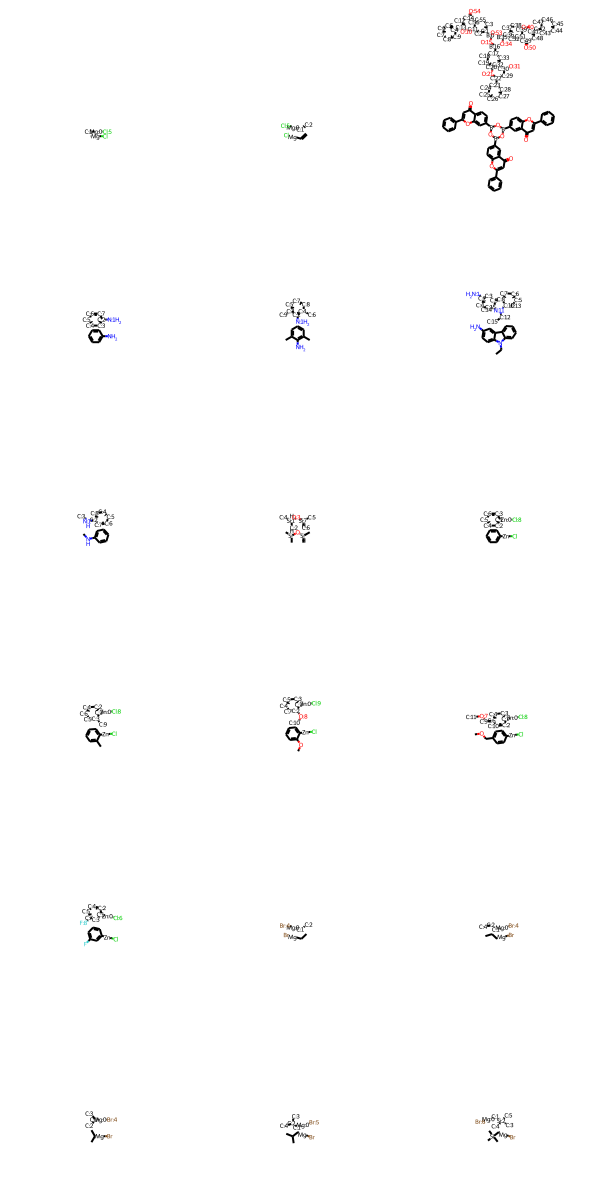

In [23]:
mols= []
for smi in diff_smi:
    smis = str(smi + '.' + diff_smi_num[diff_smi.index(smi)]) 
    mols.append(Chem.MolFromSmiles(smis))
Chem.Draw.MolsToGridImage(mols)

In [24]:
num_df2 = pd.DataFrame({'react' : diff_smi ,
                        'C0C7_num' : diff_smi_num})

In [54]:
#num_df2

In [25]:
num_df = num_df.append(num_df2)

In [26]:
#num_df

In [27]:
'CC(C)[Mg]Br' in num_df["react"].to_list()

True

In [28]:
num_df[num_df["react"] == 'C[Mg]Br']

,react,C0C7_num
167,C[Mg]Br,[Mg]([CH3:1])[Br:2]


In [30]:
num_df = num_df[num_df["react"] != 'C[Mg]Br']
num_df

,react,C0C7_num
0,[Li]c1ccccc1,[Li][c:1]1[cH:2][cH:5][cH:5][cH:4][cH:3]1
1,[Li]c1ccccc1C,[Li][c:1]1[cH:2][cH:5][cH:5][cH:6][c:3]1[CH3:4]
2,[Li]c1c(C)cc(C)cc1C,[Li][c:1]1[c:2]([CH3:5])[cH:5][c:5]([CH3:5])[c...
3,[Li]c1ccc(C(C)(C)C)cc1,[Li][c:1]1[cH:2][cH:5][c:5]([C:5]([CH3:5])([CH...
4,[Li]c1ccc(OC)cc1,[Li][c:1]1[cH:2][cH:5][c:5]([O:5][CH3:5])[cH:4...
...,...,...
13,CC[Mg]Br,[H:3][CH2:2][CH2:1][Mg:0][Br:4]
14,CCC[Mg]Br,[CH3:4][CH2:2][CH2:1][Mg:0][Br:4]
15,CC(C)[Mg]Br,[CH3:3][CH:1]([CH3:2])[Mg:0][Br:4]
16,CC(C)C[Mg]Br,[CH3:4][CH:2]([CH3:3])[CH2:1][Mg:0][Br:5]


In [31]:
new_line = pd.DataFrame({'react' : ['C[Mg]Br'] ,
                         'C0C7_num' : ['[H:2][CH:1]([H:3])[Mg:0][Br:4]']})

In [32]:
num_df = num_df.append(new_line)

In [33]:
num_df.to_csv('../data_csv/num_AX.csv')

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/rdkit/Chem/Draw/IPythonConsole.py:190: UserWarning: Truncating the list of molecules to be displayed to 200. Change the maxMols value to display more.
  warnings.warn(


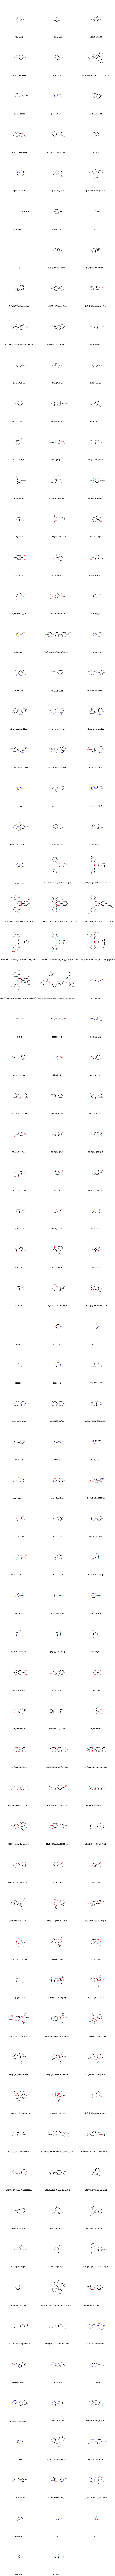

In [63]:
mols_check = [Chem.MolFromSmiles(smi) for smi in num_df["C0C7_num"]]
smis = [smi for smi in num_df["react"]]
Chem.Draw.MolsToGridImage(mols_check, legends = smis, maxMols = 200, subImgSize=(400, 400))

In [64]:
m = Chem.MolFromSmiles('Cn1cncn1')
print(nb.show_DOIS(m, 'A-X effectif', df))
#print(nb.show_smiles(m,df))

['https://doi.org/10.1039/C5SC02942B']


In [65]:
unik_lig = np.unique(df["A-X type"])

counts= []
for typ in unik_lig:
    c = df["A-X type"].to_list().count(typ), typ
    counts.append(c)
counts

[(53, 'Al'),
 (666, 'B'),
 (337, 'C-H'),
 (87, 'CO2'),
 (47, 'Li'),
 (57, 'NCO'),
 (27, 'NH'),
 (43, 'P'),
 (354, 'RMgX'),
 (58, 'Si'),
 (71, 'Zn'),
 (190, 'tbd')]

In [66]:
print(df["Mechanism"].unique())
print(df["A-X type"].unique())
print(len(df[df["A-X type"]=='tbd']))
unik_smi_1 = [Chem.CanonSmiles(i) for i in df["A-X effectif"].unique()]
print(len(np.unique(unik_smi_1)))
df = df[df["A-X type"] != 'tbd']
unik_smi_2 = [Chem.CanonSmiles(i) for i in df["A-X effectif"].unique()]
print(len(np.unique(unik_smi_2)))

['Murahashi' 'Kumada' 'Suzuki' 'C-H activation' 'Isocyanates'
 'Ni/Cu cooperation' 'CO2 Insertion' 'Buchwald' 'Negishi' 'Review'
 'Unclassified' 'Al _coupling' 'P_coupling']
['Li' 'Zn' 'RMgX' 'B' 'C-H' 'NCO' 'CO2' 'NH' 'Si' 'tbd' 'Al' 'P']
190
242
223


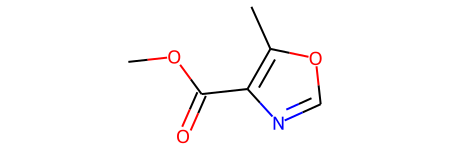

In [70]:
Chem.MolFromSmiles('COC(=O)c1ncoc1C')

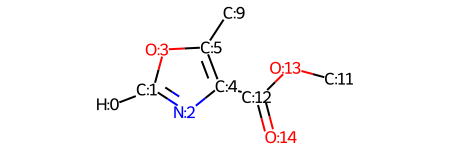

In [71]:
Chem.MolFromSmiles(num_imidazole_derivatives('COC(=O)c1ncoc1C'), Chem.rdmolops.AddHs == True)

In [1]:
# Manually add more AX